# Task 1
## Data Vizualization
### Mean Body Mass of Penguins

In [1]:
import seaborn as sns
import pandas as pd
from setuptools.package_index import unique_values
from statsmodels.graphics.tukeyplot import results

df = sns.load_dataset('penguins')
mean = df.groupby('species')['body_mass_g'].mean()
print(mean)

species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64


In [2]:
df.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### 1D Histogram of Mean Body Mass

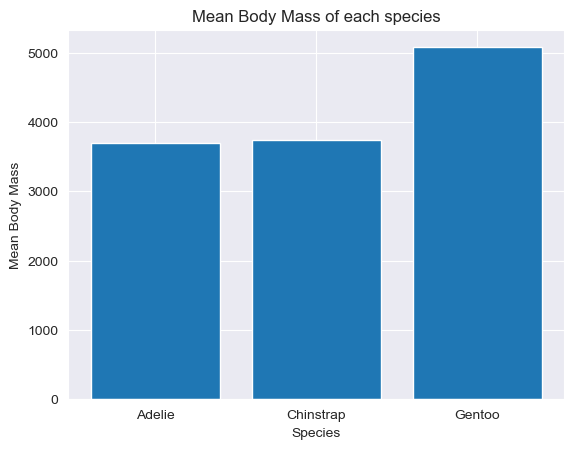

In [3]:
import matplotlib.pyplot as plt
x = mean.index
y = mean.values

plt.title('Mean Body Mass of each species')
plt.xlabel('Species')
plt.ylabel('Mean Body Mass')
plt.bar(x,y)
plt.show()

###

### 2D Scatter Plot of depth vs length of a bill

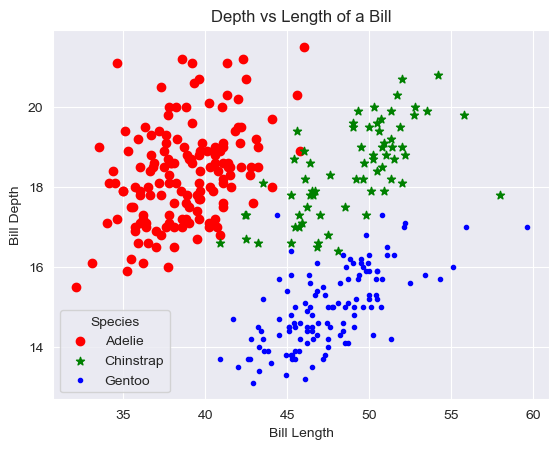

In [4]:
x = df['bill_length_mm']
y = df['bill_depth_mm']
plt.title('Depth vs Length of a Bill')
plt.xlabel('Bill Length')
plt.ylabel('Bill Depth')
colors = {'Adelie':'red', 'Chinstrap':'green', 'Gentoo':'blue'}
markers = {'Adelie':'o', 'Chinstrap':'*', 'Gentoo':'.'}
for s in df['species'].unique():
    subset = df[df['species'] == s]
    x = subset['bill_length_mm']
    y = subset['bill_depth_mm']
    plt.scatter(x,y,c=colors[s], marker=markers[s], label = s)
plt.legend(title='Species')
plt.show()

### 3D Scatter Plot of body mass vs bill length vs bill depth

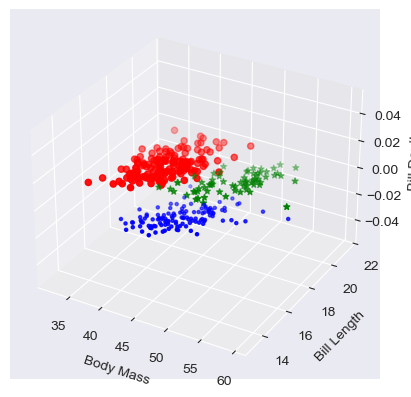

In [5]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = df['body_mass_g']
y = df['bill_length_mm']
z = df['bill_depth_mm']
colors = {'Adelie':'red', 'Chinstrap':'green', 'Gentoo':'blue'}
markers = {'Adelie':'o', 'Chinstrap':'*', 'Gentoo':'.'}
for s in df['species'].unique():
    subset = df[df['species'] == s]
    x = subset['bill_length_mm']
    y = subset['bill_depth_mm']
    ax.scatter(x,y,c=colors[s], marker=markers[s], label = s)
ax.set_xlabel('Body Mass')
ax.set_ylabel('Bill Length')
ax.set_zlabel('Bill Depth')
plt.show()

### Histogram of length of a flipper

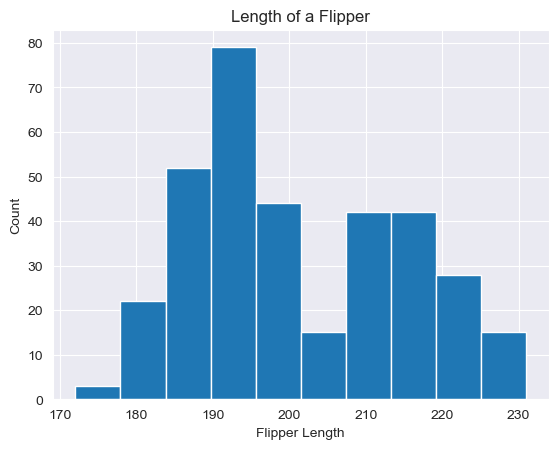

In [6]:
x = df['flipper_length_mm']
plt.title('Length of a Flipper')
plt.xlabel('Flipper Length')
plt.ylabel('Count')
plt.hist(x)
plt.show()

### Heatmap of length of islands and species

species    Adelie  Chinstrap  Gentoo
island                              
Biscoe       44.0        NaN   124.0
Dream        56.0       68.0     NaN
Torgersen    52.0        NaN     NaN


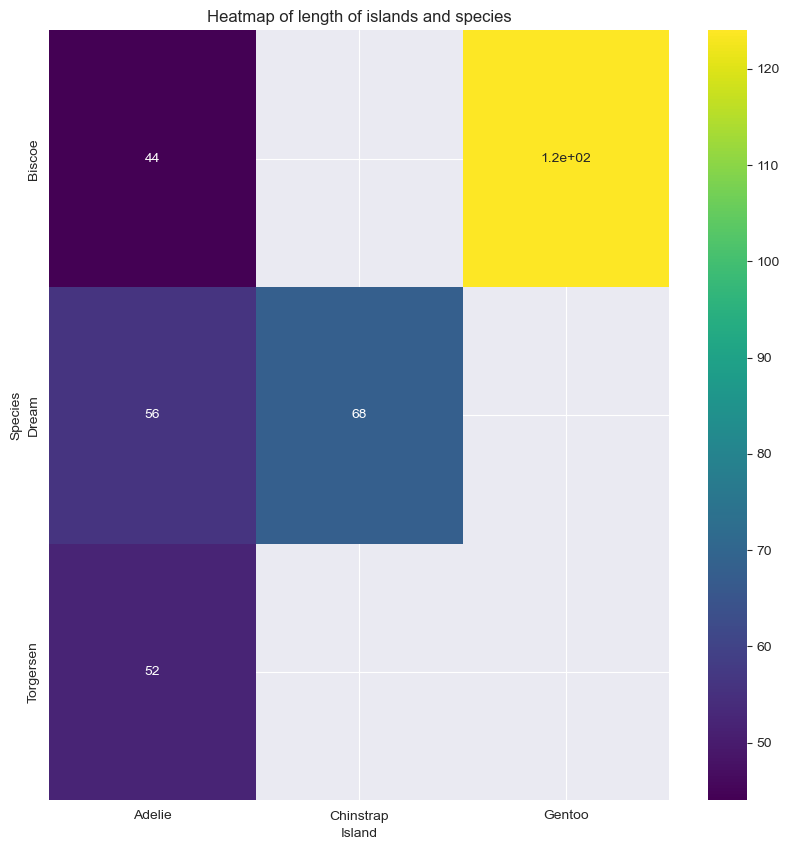

In [7]:
x = df['island']
y = df['species']
observations = df.groupby(['island', 'species']).size()
multi_index = pd.MultiIndex.from_tuples(observations.keys(), names=['island', 'species'])
series = pd.Series(observations, index=multi_index)
heatmap_data = series.unstack(level='species')

print(heatmap_data)

plt.figure(figsize=(10,10))
sns.heatmap(heatmap_data, annot=True, cmap='viridis')
plt.title('Heatmap of length of islands and species')
plt.xlabel('Island')
plt.ylabel('Species')
plt.show()

### Boxplot of body mass and sex

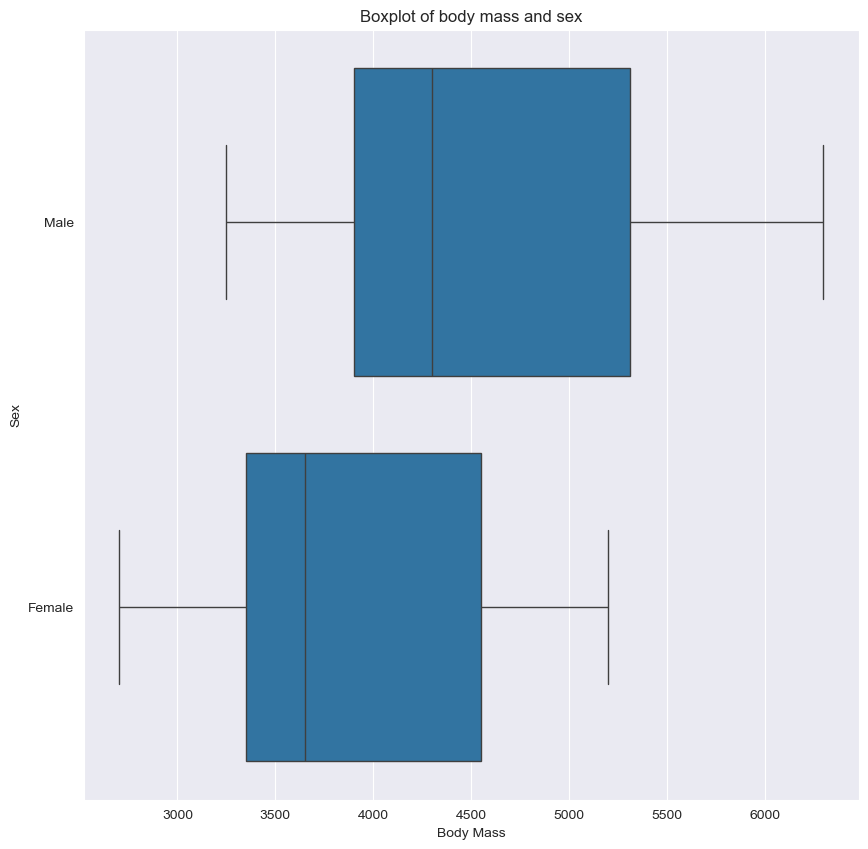

In [8]:
plt.figure(figsize=(10,10))
sns.boxplot(x='body_mass_g', y='sex', data=df)
plt.title('Boxplot of body mass and sex')
plt.xlabel('Body Mass')
plt.ylabel('Sex')
plt.show()

### Boxplot of body mass and island

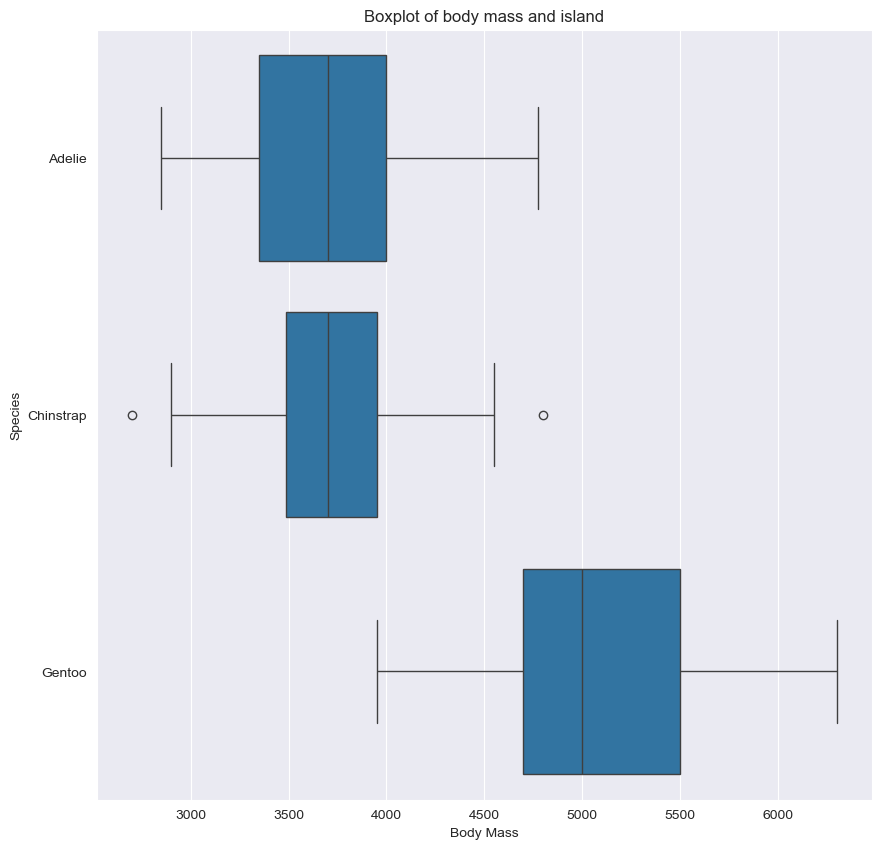

In [9]:
plt.figure(figsize=(10,10))
sns.boxplot(x='body_mass_g', y='species', data=df)
plt.title('Boxplot of body mass and island')
plt.xlabel('Body Mass')
plt.ylabel('Species')
plt.show()

### Surface plot of length of a bill, depth of a bill and body mass

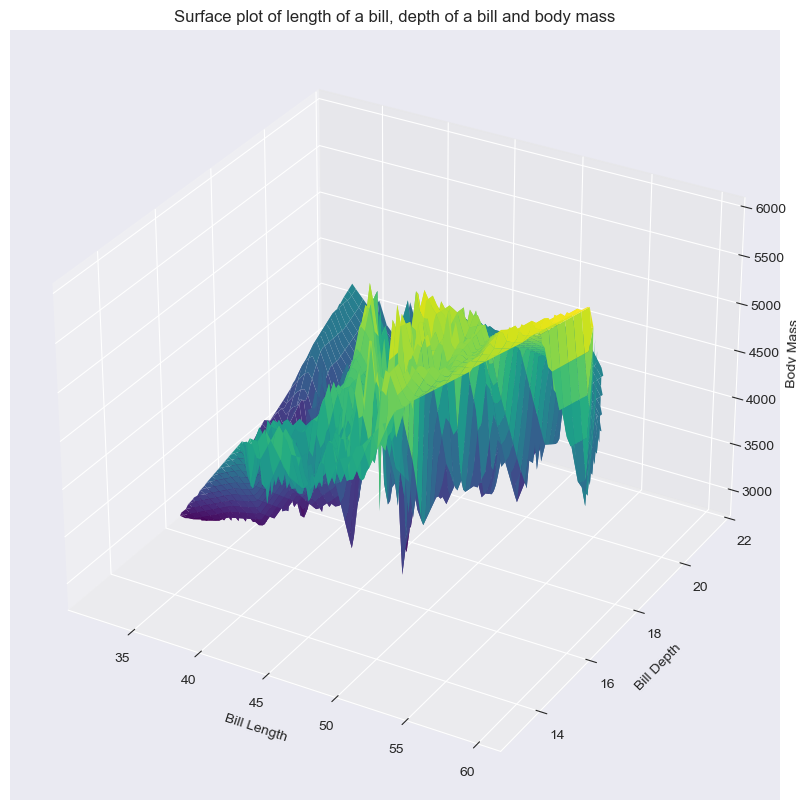

In [10]:
import numpy as np
from scipy.interpolate import griddata
df_clean = df.dropna(subset=['bill_length_mm', 'bill_depth_mm', 'body_mass_g'])
x = df_clean['bill_length_mm']
y = df_clean['bill_depth_mm']
z = df_clean['body_mass_g']

x_grid, y_grid = np.meshgrid(np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100))
z_grid = griddata((x, y), z, (x_grid, y_grid), method='linear')

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_grid,y_grid,z_grid, cmap='viridis', edgecolor='none')

ax.set_title("Surface plot of length of a bill, depth of a bill and body mass")
ax.set_xlabel('Bill Length')
ax.set_ylabel('Bill Depth')
ax.set_zlabel('Body Mass')
plt.show()

# Cleaning, consolidation, transformation, mapping of a data

### Read data

In [11]:
url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
df = pd.read_csv(url)

### Indenfication of missing values and drop them

In [12]:
print("Number of duplicates before dropping:",df.duplicated().sum(),"\nNumber of rows:",len(df))
df.drop_duplicates(keep='first', inplace=True)
print("Number of duplicates after dropping:",df.duplicated().sum(),"\nNumber of rows:",len(df))

Number of duplicates before dropping: 0 
Number of rows: 20640
Number of duplicates after dropping: 0 
Number of rows: 20640


### Adding duplicate rows and elimination of duplicates

In [13]:
df = pd.concat([df,df.iloc[0:10]], ignore_index=True)
print("Number of duplicates after adding duplicate rows:",df.duplicated().sum(),"\nNumber of rows:",len(df))

df = df.drop_duplicates(keep='first', inplace=False)
print("Number of duplicates after dropping duplicate rows:",df.duplicated().sum(),"\nNumber of rows:",len(df))


Number of duplicates after adding duplicate rows: 10 
Number of rows: 20650
Number of duplicates after dropping duplicate rows: 0 
Number of rows: 20640


### Cleaning empty rows

In [14]:
print("After cleaning:\n",df.isna().sum())
df.dropna(how='any', inplace=True)
print("\nAfter cleaning:\n",df.isna().sum())

After cleaning:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

After cleaning:
 longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


### Inputing missing values by mean

In [15]:
df = pd.read_csv(url)
print('Number of missing values before imputing:',df['total_bedrooms'].isna().sum())
mean_value = int(df['total_bedrooms'].mean())
df['total_bedrooms'] = df['total_bedrooms'].fillna(mean_value)
print('Number of missing values after imputing:',df['total_bedrooms'].isna().sum())
df.head()


Number of missing values before imputing: 207
Number of missing values after imputing: 0


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Inputing missing values by median

In [16]:
min_value = df['median_income'].min()
max_value = df['median_income'].max()
df['median_income'] = (df['median_income'] - min_value) / (max_value - min_value)
df['median_income'].head(100)

0     0.539668
1     0.538027
2     0.466028
3     0.354699
4     0.230776
        ...   
95    0.104116
96    0.161005
97    0.103881
98    0.049558
99    0.145550
Name: median_income, Length: 100, dtype: float64

### Mapping of a data

In [17]:
unique_values = df['ocean_proximity'].unique().tolist()
print(unique_values)

df['ocean_proximity'] = df['ocean_proximity'].map({'NEAR BAY': 0, '<1H OCEAN': 1, 'INLAND': 2, 'NEAR OCEAN': 3, 'ISLAND': 4})
df['ocean_proximity'].head(10000)


['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND']


0       0
1       0
2       0
3       0
4       0
       ..
9995    2
9996    2
9997    2
9998    2
9999    2
Name: ocean_proximity, Length: 10000, dtype: int64

### Transformation of median_house_value to logarithm

In [18]:
df['median_house_value'] = np.log(df['median_house_value'])
df['median_house_value'].head(100)

0     13.022764
1     12.789684
2     12.771671
3     12.740517
4     12.743151
        ...    
95    11.775290
96    12.121603
97    11.736069
98    12.043554
99    12.170963
Name: median_house_value, Length: 100, dtype: float64

### Mapping of a data to a categories

In [19]:
def age_category(age):
    if age < 10:
        return 0
    elif age < 20:
        return 1
    elif age < 30:
        return 2
    elif age < 40:
        return 3
    elif age < 50:
        return 4
    else:
        return 5

df['age_category'] = df['housing_median_age'].map(age_category)
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,age_category
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,0.539668,13.022764,0,4
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,0.538027,12.789684,0,2
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,0.466028,12.771671,0,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,0.354699,12.740517,0,5
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,0.230776,12.743151,0,5
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,0.243921,12.505066,0,5
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,0.217873,12.608868,0,5
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,0.180694,12.394211,0,5
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,0.108998,12.331383,0,4
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,0.220087,12.472659,0,5


### Analizing of new columns

Number of unique values in age_category: 6

Summary table:
    Age category  Number
0             3    5789
1             2    4841
2             1    4523
3             4    2725
4             5    1457
5             0    1305

Description statistics for median_house_value:
 count    20640.000000
mean        12.084884
std          0.569134
min          9.615739
25%         11.691908
50%         12.099044
75%         12.486447
max         13.122365
Name: median_house_value, dtype: float64


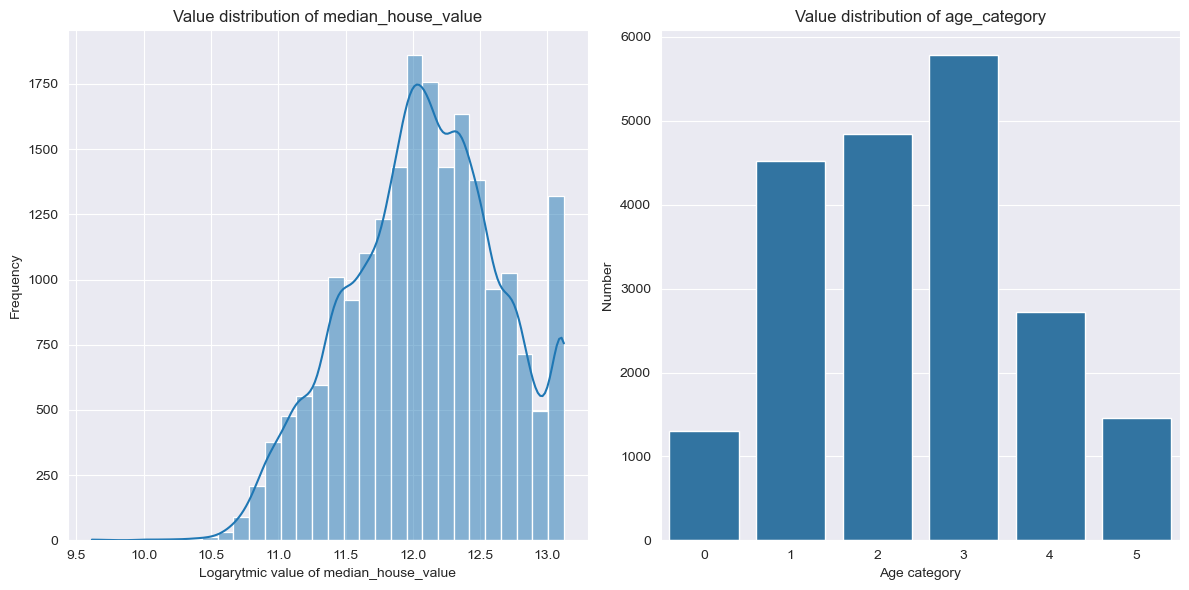

In [20]:
unique_age_categories = df['age_category'].nunique()
unique_age_categories_count = df['age_category'].value_counts()
print("Number of unique values in age_category:", unique_age_categories)
summary_table = pd.DataFrame({
    'Age category': unique_age_categories_count.index,
    'Number': unique_age_categories_count.values
})
print("\nSummary table:\n", summary_table)

log_value_description = df['median_house_value'].describe()
print("\nDescription statistics for median_house_value:\n", log_value_description)

# Wykres rozkładu wartości w median_house_value
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['median_house_value'], bins=30, kde=True)
plt.title('Value distribution of median_house_value')
plt.xlabel('Logarytmic value of median_house_value')
plt.ylabel('Frequency')

# Wykres słupkowy dla age_category
plt.subplot(1, 2, 2)
sns.barplot(x=summary_table['Age category'], y=summary_table['Number'])
plt.title('Value distribution of age_category')
plt.xlabel('Age category')
plt.ylabel('Number')

plt.tight_layout()
plt.show()

### Inputing missing values by KNN

In [21]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,r2_score
import pandas as pd
import numpy as np

# Завантаження даних
df = pd.read_csv(url)
df_copy = df.copy()

# Кодування категоріальних змінних
encoder = LabelEncoder()
df['ocean_proximity'] = encoder.fit_transform(df['ocean_proximity'])

# Випадкове встановлення NaN
np.random.seed(42)
nan_indices = np.random.choice(df.index, size=int(len(df) * 0.1), replace=False)
df.loc[nan_indices, 'median_house_value'] = np.nan

# Параметри для KNN
best_param = range(5, 50)
results = []

# Заповнення NaN значень та оцінка продуктивності
for param in best_param:
    inputer = KNNImputer(n_neighbors=param)
    df_inputed = pd.DataFrame(inputer.fit_transform(df), columns=df.columns)

    # Обчислення метрик для всіх NaN значень
    mae = (df_copy.loc[nan_indices, 'median_house_value'] - df_inputed.loc[nan_indices, 'median_house_value']).abs().mean()
    mse = ((df_copy.loc[nan_indices, 'median_house_value'] - df_inputed.loc[nan_indices, 'median_house_value']) ** 2).mean()
    r2 = r2_score(df_copy.loc[nan_indices, 'median_house_value'], df_inputed.loc[nan_indices, 'median_house_value'])

    results.append({
        'Neighbors': param,
        'MAE': mae,
        'MSE': mse,
        'R^2': r2
    })

# Створення DataFrame з результатами
df_results = pd.DataFrame(results)

# Визначення найкращого параметра
best_neighbors = df_results.loc[df_results['MAE'].idxmin(), 'Neighbors']
print("Найкращий параметр:", best_neighbors)

# Заповнення NaN значень за допомогою KNN з найкращим параметром
knn_imputer = KNNImputer(n_neighbors=int(best_neighbors))
df_filled = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)

# Отримання заповнених значень для nan_indices
df_knn = df_filled.loc[nan_indices, ['median_house_value']]
df_knn = df_knn.set_index(pd.Index(nan_indices))
# Перевірка результатів
print("Заповнені значення для NaN індексів:")
print(df_knn)
print("Довжина df_knn:", len(df_knn))

Найкращий параметр: 24
Заповнені значення для NaN індексів:
       median_house_value
20046       143095.833333
3024        173975.000000
15663       333779.375000
20484       178612.500000
9814        220429.166667
...                   ...
9477        241720.833333
46          190925.000000
20462       359550.291667
4751        144266.666667
13298       153345.833333

[2064 rows x 1 columns]
Довжина df_knn: 2064


In [22]:
# # Знайти найкращий параметр для MSE
# best_mse_row = df_knn.loc[df_knn['MSE'].idxmin()]
# best_mse_neighbors = best_mse_row['Neighbors']
# best_mse_value = best_mse_row['MSE']
#
# print(f"Best number of neighbors for MSE: {best_mse_neighbors}, MSE: {best_mse_value:.4f}")
#
# # Знайти найкращий параметр для R^2
# best_r2_row = df_KNN.loc[df_KNN['R^2'].idxmax()]
# best_r2_neighbors = best_r2_row['Neighbors']
# best_r2_value = best_r2_row['R^2']
#
# print(f"Best number of neighbors for R^2: {best_r2_neighbors}, R^2: {best_r2_value:.4f}")
# best_mse_row = df_KNN.loc[df_KNN['MAE'].idxmin()]
# best_mse_neighbors = best_mse_row['Neighbors']
# best_mse_value = best_mse_row['MAE']
#
# print(f"Best number of neighbors for MAE: {best_mse_neighbors}, MAE: {best_mse_value:.4f}")

### OneHotEncoder

In [23]:
# import pandas as pd
# import numpy as np
# from sklearn.impute import KNNImputer
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#
# # Завантаження даних
# df = pd.read_csv(url)
#
# # 1. Імплементація OneHotEncoder для категоріальних змінних
# encoder = OneHotEncoder(drop='first')
# encoded_columns = encoder.fit_transform(df[['ocean_proximity']])
# encoded_df = pd.DataFrame(encoded_columns.toarray(), columns=encoder.get_feature_names_out(['ocean_proximity']))
#
# # Об'єднуємо закодовані колонки з оригінальним DataFrame
# df = pd.concat([df.drop(columns=['ocean_proximity']), encoded_df], axis=1)
#
# # 2. Зберігаємо оригінальні значення
# df_original = df.copy()
#
# # 3. Маскуємо деякі значення для тесту (імітуємо пропуски)
# df_missing = df.copy()
# df_missing.loc[df_missing['median_house_value'].notna(), 'median_house_value'] = np.nan
#
# # 4. Заповнюємо пропуски методом KNN
# imputer = KNNImputer(n_neighbors=5)
# imputed_values = imputer.fit_transform(df_missing)
#
# # Створюємо новий DataFrame з імпутованими значеннями
# df_imputed = pd.DataFrame(imputed_values, columns=df.columns)
#
# # 5. Порівнюємо тільки ті елементи, які були NaN
# mask = df_missing['median_house_value'].isna()  # Маска для NaN
# true_values = df_original['median_house_value'].loc[mask]  # Фактичні значення
# predicted_values = df_imputed['median_house_value'].loc[mask]  # Заповнені значення
#
# # Перевірка кількості рядків
# print(f"Кількість фактичних значень: {true_values.shape[0]}")
# print(f"Кількість заповнених значень: {predicted_values.shape[0]}")
#
# if true_values.shape[0] == predicted_values.shape[0] and true_values.shape[0] > 0:
#     # Обчислення метрик
#     mae = mean_absolute_error(true_values, predicted_values)
#     mse = mean_squared_error(true_values, predicted_values)
#     r2 = r2_score(true_values, predicted_values)
#     print(f"MAE: {mae:.2f}")
#     print(f"MSE: {mse:.2f}")
#     print(f"R^2: {r2:.2f}")
# else:
#     print("Кількість рядків у фактичних і заповнених значеннях не збігається або немає жодного рядка для порівняння.")

### Inputing missing values by Random Forest

In [24]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, GridSearchCV

# Завантаження даних
df = pd.read_csv(url)
df['age_category'] = df['housing_median_age'].map(age_category)
df['ocean_proximity'] = df['ocean_proximity'].map({'NEAR BAY': 0, '<1H OCEAN': 1, 'INLAND': 2, 'NEAR OCEAN': 3, 'ISLAND': 4})
df = df.fillna(mean_value)
df_copy = df.copy()

# Випадкове встановлення NaN
df.loc[nan_indices, 'median_house_value'] = np.nan

# Створення X та y
X = df_copy.loc[:, ['ocean_proximity', 'age_category', 'population', 'total_bedrooms', 'median_income', 'households']]
y = df_copy['median_house_value']  # Не видаляємо NaN

# Параметри для Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Крос-валідація
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Створення моделі
rf_model = RandomForestRegressor()

# Виконання Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X, y)  # Навчайте модель на даних без NaN

# Найкращі параметри
best_params = grid_search.best_params_
print("Найкращі параметри:", best_params)

# Тепер ви можете використовувати модель з оптимізованими параметрами для заповнення NaN
best_rf_model = RandomForestRegressor(**best_params)

# Масив для зберігання заповнених значень
filled_values = np.full(len(df_copy), np.nan)  # Ініціалізуйте масив з NaN

# Крос-валідація для навчання моделі
for train_index, test_index in kf.split(df):
    # Розділення даних на навчальний та тестовий набори
    train_data = df_copy.iloc[train_index]
    test_data = df_copy.iloc[test_index]

    # Навчання моделі на даних без NaN
    X_train = train_data.drop(columns=['median_house_value'])
    y_train = train_data['median_house_value'].dropna()

    best_rf_model.fit(X_train, y_train)

    # Заповнення NaN для тестового набору
    for idx in test_index:
        if np.isnan(df.loc[idx, 'median_house_value']):
            # Передайте правильний формат для прогнозування
            filled_values[idx] = best_rf_model.predict(df.iloc[[idx]].drop('median_house_value', axis=1))[0]

# Додавання заповнених значень до DataFrame
df['median_house_value'] = df['median_house_value'].fillna(pd.Series(filled_values))

# Перевірка результатів
print("Заповнені значення для NaN індексів:")
print(df.loc[nan_indices, 'median_house_value'])
print("Оригінальні значення для NaN індексів:")
print(df_copy.loc[nan_indices, 'median_house_value'])

Найкращі параметри: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Заповнені значення для NaN індексів:
20046     53630.503758
3024      66807.101408
15663    472340.967787
20484    264398.359014
9814     273349.166960
             ...      
9477     120383.626328
46       138847.883249
20462    265565.189604
4751     158541.489052
13298    137326.242154
Name: median_house_value, Length: 2064, dtype: float64
Оригінальні значення для NaN індексів:
20046     47700.0
3024      45800.0
15663    500001.0
20484    218600.0
9814     278000.0
           ...   
9477      96000.0
46       142500.0
20462    266300.0
4751     165000.0
13298    118000.0
Name: median_house_value, Length: 2064, dtype: float64


In [35]:
actual_values = df_copy.loc[nan_indices, 'median_house_value'].squeeze()
predicted_knn = df_knn.squeeze()
predicted_rf = df.loc[nan_indices, 'median_house_value'].squeeze()
#predicted_lr = df_lr.loc[nan_indices, 'median_house_value']
print(len(actual_values),len(predicted_rf))
# Tworzenie tabeli porównawczej
comparison_df = pd.DataFrame({
    'Actual': actual_values,
    'KNN': predicted_knn,
    'Random Forest': predicted_rf
#     #'Linear Regression': predicted_lr
})
comparison_df.head()

2064 2064


,Actual,KNN,Random Forest
20046,47700.0,143095.833333,53630.503758
3024,45800.0,173975.000000,66807.101408
15663,500001.0,333779.375000,472340.967787
20484,218600.0,178612.500000,264398.359014
9814,278000.0,220429.166667,273349.166960


### Inputing missing values by Neural Network

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Завантаження даних
df = pd.read_csv(url)
df_copy = df.copy()

# Випадкове встановлення NaN
np.random.seed(42)
nan_indices = np.random.choice(df.index, size=int(len(df) * 0.1), replace=False)
df_copy.loc[nan_indices, 'median_house_value'] = np.nan

# Створення X та y
X = df_copy.loc[:, ['ocean_proximity', 'age_category', 'population', 'total_bedrooms', 'median_income', 'households']]
y = df_copy['median_house_value']  # Не видаляємо NaN

# Видалення NaN значень з X та y для навчання
X_train = X[~y.isna()]
y_train = y.dropna()

# Стандартизація даних
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Створення моделі нейронної мережі
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Вихідний шар для регресії

# Компиляція моделі
model.compile(optimizer='adam', loss='mean_squared_error')

# Навчання моделі
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)

# Заповнення NaN значень
filled_values_nn = np.zeros(len(df))

# Стандартизуємо дані для заповнення NaN
X_scaled = scaler.transform(X)

for idx in nan_indices:
    if np.isnan(df.loc[idx, 'median_house_value']):
        filled_values_nn[idx] = model.predict(np.array([X_scaled[idx]]))[0][0]

# Додавання заповнених значень до DataFrame
df_NN = df['median_house_value'].fillna(pd.Series(filled_values_nn), inplace=True)

# Перевірка результатів
print("Заповнені значення для NaN індексів:")
print(df.loc[nan_indices, 'median_house_value'])
print("Оригінальні значення для NaN індексів:")
print(df_copy.loc[nan_indices, 'median_house_value'])

ModuleNotFoundError: No module named 'tensorflow'